<a href="https://colab.research.google.com/github/robin-ochieng/time-series/blob/main/Prophet_Vehicle_sales(New_business)_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#import/load the data 
sales_data = pd.read_excel('vehicle_sales2022.xlsx',  index_col='Date', parse_dates = True)

In [3]:
sales_data.dtypes

ID                  int64
Name               object
Type of cover      object
Plate Number       object
Sales             float64
dtype: object

In [4]:
sales_data

,ID,Name,Type of cover,Plate Number,Sales
Date,,,,,
2022-01-01 00:00:00,5,ROBERT OUKO YAMBO,TPO,KAH 604M,7574.0
2022-01-02 00:00:00,14,JOHN PAUL OJUANDO,COMPREHENSIVE,KAV 906R,25113.0
2022-01-02 00:19:00,30,GEORGE KABUGI THIGA,TPO,KBN 554D,7574.0
2022-01-03 00:40:00,17,PHILEMON YEGON,COMPREHENSIVE,KCU 839B,NaN
2022-01-04 00:00:00,15,BEVERLINE OKENYURI,COMPREHENSIVE,KDA 564U,39718.0
...,...,...,...,...,...
2022-12-31 00:00:00,1022,JANEFER MATINDE,Third Party,KDD670G,2063.0
2022-12-31 00:00:00,1023,IAN KINYUA,Third Party,KBU 611L,2063.0
2022-12-31 00:00:00,1024,KADHUA JIMMY KAHINDI,Third Party,Kbl 114A,2063.0


In [5]:
new_business_sales = sales_data.iloc[:, 4:]

In [6]:
new_business_sales

,Sales
Date,
2022-01-01 00:00:00,7574.0
2022-01-02 00:00:00,25113.0
2022-01-02 00:19:00,7574.0
2022-01-03 00:40:00,NaN
2022-01-04 00:00:00,39718.0
...,...
2022-12-31 00:00:00,2063.0
2022-12-31 00:00:00,2063.0
2022-12-31 00:00:00,2063.0


In [7]:
new_business_sales = new_business_sales.resample('D').sum()

In [8]:
new_business_sales

,Sales
Date,
2022-01-01,7574.0
2022-01-02,32687.0
2022-01-03,0.0
2022-01-04,52355.0
2022-01-05,0.0
...,...
2022-12-27,3094.0
2022-12-28,0.0
2022-12-29,2063.0


In [9]:
vehicle_sales =  new_business_sales[new_business_sales != 0]
print(vehicle_sales)

              Sales
Date               
2022-01-01   7574.0
2022-01-02  32687.0
2022-01-03      NaN
2022-01-04  52355.0
2022-01-05      NaN
...             ...
2022-12-27   3094.0
2022-12-28      NaN
2022-12-29   2063.0
2022-12-30      NaN
2022-12-31  32779.0

[365 rows x 1 columns]


In [10]:
vehicle_sales = vehicle_sales.dropna(subset=['Sales'])
print(vehicle_sales)

              Sales
Date               
2022-01-01   7574.0
2022-01-02  32687.0
2022-01-04  52355.0
2022-01-09  82951.5
2022-01-11   5063.0
...             ...
2022-12-25  30337.0
2022-12-26   6610.0
2022-12-27   3094.0
2022-12-29   2063.0
2022-12-31  32779.0

[293 rows x 1 columns]


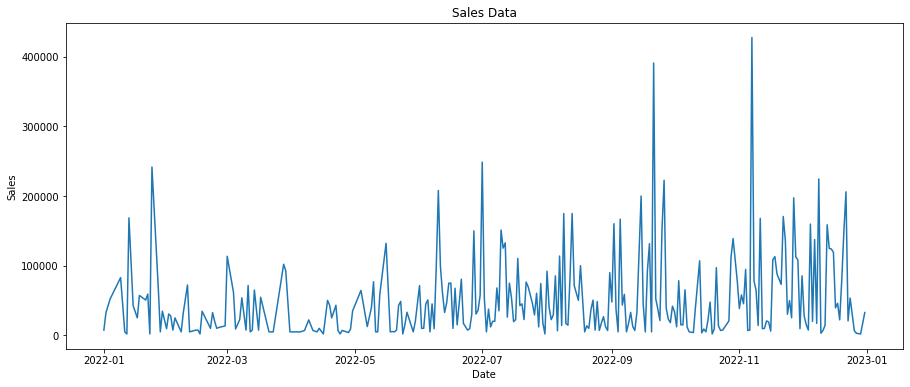

In [11]:
# Plot the sales data to visualize the trend and seasonality
plt.figure(figsize=(15,6))
plt.plot(vehicle_sales['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Data')
plt.show()

In [12]:
# Prepare the data for use with Prophet
vehicle_sales = pd.DataFrame({'ds': vehicle_sales.index, 'y': vehicle_sales['Sales']})

In [13]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!conda install -c conda-forge fbprophet -y

/bin/bash: conda: command not found


In [15]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from prophet import Prophet


In [17]:
# Train the Prophet model using the historical data
model = Prophet()
model.fit(vehicle_sales)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmrtbe6wj/14lc1z73.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmrtbe6wj/s8mclfoa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10279', 'data', 'file=/tmp/tmpmrtbe6wj/14lc1z73.json', 'init=/tmp/tmpmrtbe6wj/s8mclfoa.json', 'output', 'file=/tmp/tmpmrtbe6wj/prophet_modelkpsb_xh8/prophet_model-20230322101536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
# Make predictions for 2023
future_dates = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future_dates)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,25937.016991,-59678.851831,81507.253297,25937.016991,25937.016991,-17299.242202,-17299.242202,-17299.242202,-17299.242202,-17299.242202,-17299.242202,0.0,0.0,0.0,8637.774789
1,2022-01-02,26057.166569,-56783.288486,90119.470711,26057.166569,26057.166569,-11935.054068,-11935.054068,-11935.054068,-11935.054068,-11935.054068,-11935.054068,0.0,0.0,0.0,14122.112501
2,2022-01-04,26297.465725,-43425.384835,101835.167611,26297.465725,26297.465725,2904.621178,2904.621178,2904.621178,2904.621178,2904.621178,2904.621178,0.0,0.0,0.0,29202.086903
3,2022-01-09,26898.213615,-54210.107686,87569.113959,26898.213615,26898.213615,-11935.054068,-11935.054068,-11935.054068,-11935.054068,-11935.054068,-11935.054068,0.0,0.0,0.0,14963.159547
4,2022-01-11,27138.512771,-44030.584068,103770.237562,27138.512771,27138.512771,2904.621178,2904.621178,2904.621178,2904.621178,2904.621178,2904.621178,0.0,0.0,0.0,30043.133949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2023-01-26,73606.865585,-1784.093401,142582.365304,73603.531691,73610.609397,-1825.857317,-1825.857317,-1825.857317,-1825.857317,-1825.857317,-1825.857317,0.0,0.0,0.0,71781.008269
319,2023-01-27,73729.867169,15738.972171,159766.445738,73726.347376,73733.871844,13174.402132,13174.402132,13174.402132,13174.402132,13174.402132,13174.402132,0.0,0.0,0.0,86904.269301
320,2023-01-28,73852.868753,-11846.621463,124692.942997,73849.053006,73857.099862,-17299.242202,-17299.242202,-17299.242202,-17299.242202,-17299.242202,-17299.242202,0.0,0.0,0.0,56553.626551
321,2023-01-29,73975.870337,-11899.266244,135663.056338,73971.821775,73980.364499,-11935.054068,-11935.054068,-11935.054068,-11935.054068,-11935.054068,-11935.054068,0.0,0.0,0.0,62040.816269


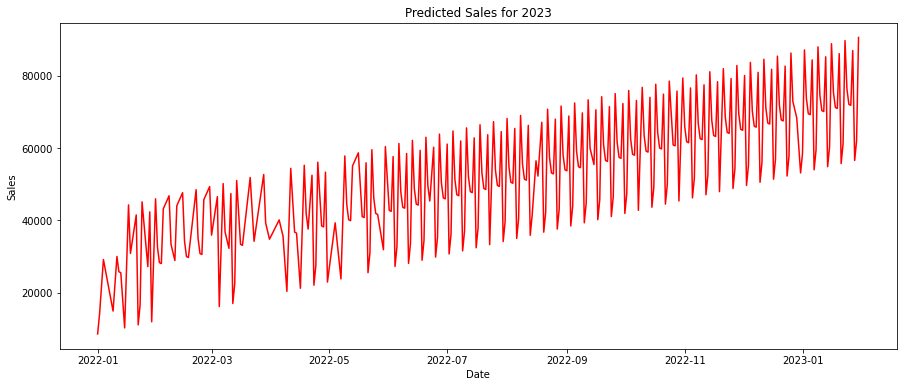

In [20]:
# Plot the predicted sales for 2023
plt.figure(figsize=(15,6))
plt.plot(forecast['ds'], forecast['yhat'], color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted Sales for 2023')
plt.show()

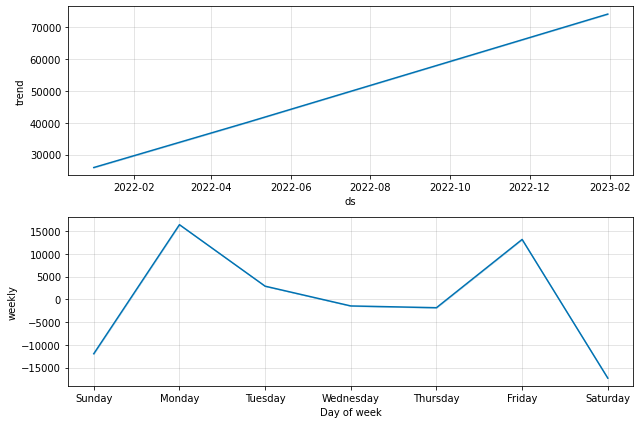

In [21]:
# Plot the trend and seasonality components of the predicted sales
fig = model.plot_components(forecast)
plt.show()

In [22]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

            ds          yhat    yhat_lower     yhat_upper
293 2023-01-01  58596.771923 -12997.654902  128435.581194
294 2023-01-02  87074.413805  15941.127423  156035.358581
295 2023-01-03  73682.450337   3530.420718  153748.691648
296 2023-01-04  69462.374789    -41.360894  143158.114176
297 2023-01-05  69197.975009   -801.443723  140671.108708
298 2023-01-06  84321.236042  10461.910288  157671.106241
299 2023-01-07  53970.593291 -18245.184016  127360.717189
300 2023-01-08  59457.783009 -11419.073489  130165.793506
301 2023-01-09  87935.424892  15194.324310  158210.033757
302 2023-01-10  74543.461423   6162.925133  149811.906534
303 2023-01-11  70323.385875  -1086.562876  143719.358928
304 2023-01-12  70058.986096  -2605.405490  143114.516331
305 2023-01-13  85182.247128  16687.790569  160768.002568
306 2023-01-14  54831.604378 -13876.900377  128083.002472
307 2023-01-15  60318.794096 -14335.989354  137781.830676
308 2023-01-16  88796.435978  15158.640660  154744.595571
309 2023-01-17

In [23]:
print(forecast[['ds', 'yhat_upper']].tail(30))

            ds     yhat_upper
293 2023-01-01  128435.581194
294 2023-01-02  156035.358581
295 2023-01-03  153748.691648
296 2023-01-04  143158.114176
297 2023-01-05  140671.108708
298 2023-01-06  157671.106241
299 2023-01-07  127360.717189
300 2023-01-08  130165.793506
301 2023-01-09  158210.033757
302 2023-01-10  149811.906534
303 2023-01-11  143719.358928
304 2023-01-12  143114.516331
305 2023-01-13  160768.002568
306 2023-01-14  128083.002472
307 2023-01-15  137781.830676
308 2023-01-16  154744.595571
309 2023-01-17  148749.418141
310 2023-01-18  139646.210133
311 2023-01-19  145212.756248
312 2023-01-20  154149.555285
313 2023-01-21  127317.029660
314 2023-01-22  137381.582730
315 2023-01-23  163674.614348
316 2023-01-24  146541.124178
317 2023-01-25  150026.840494
318 2023-01-26  142582.365304
319 2023-01-27  159766.445738
320 2023-01-28  124692.942997
321 2023-01-29  135663.056338
322 2023-01-30  165825.248424


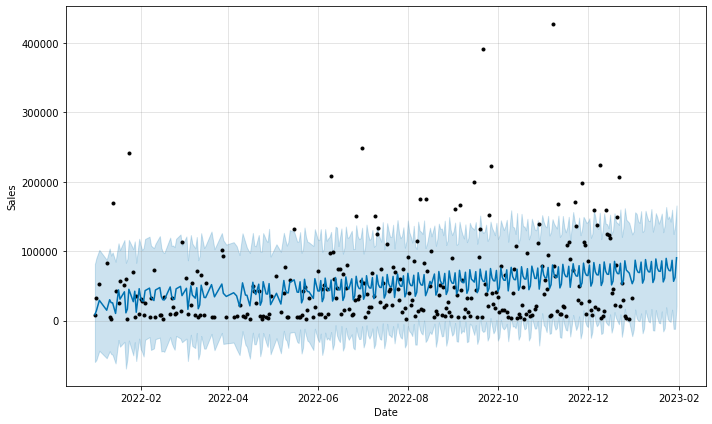

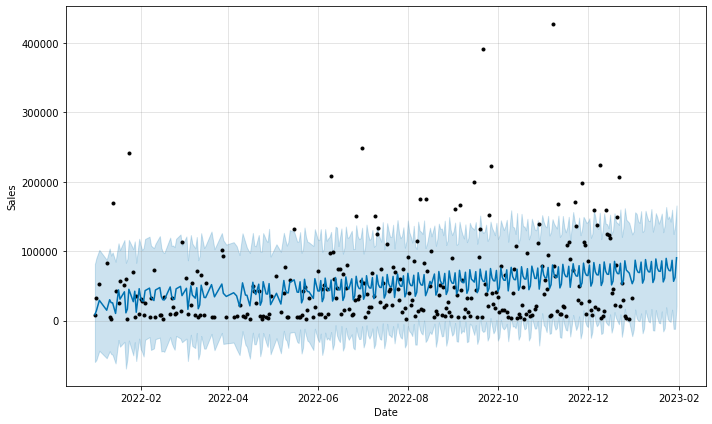

In [24]:
model.plot(forecast, xlabel='Date', ylabel='Sales')